<a href="https://colab.research.google.com/github/asd08573064/Python/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown --id '1KSFIRh0-_Vr7SdiSCZP1ItV7bXPxMD92' --output data.tar.gz
!tar -zxvf data.tar.gz
!ls

Downloading...
From: https://drive.google.com/uc?id=1KSFIRh0-_Vr7SdiSCZP1ItV7bXPxMD92
To: /content/data.tar.gz
6.11MB [00:00, 23.2MB/s]
data/
data/sample_submission.csv
data/test_no_label.csv
data/train.csv
data/X_test
data/X_train
data/Y_train
data  data.tar.gz  sample_data


Size of training set: 48830
Size of development set: 5426
Size of testing set: 27622
Dimension of data: 510
[0.88044235]
0.2994775913745653
[0.87062293]
0.30608872679881666
[0.8818759]
0.27849044376342413
[0.8728345]
0.2968844965436548
[0.88265411]
0.2755199422417608
[0.8730188]
0.29419792444104054
[0.88267459]
0.2745995209143003
[0.87228161]
0.2929478415256436
[0.88296129]
0.27361419344057847
[0.87338739]
0.29243954569807207


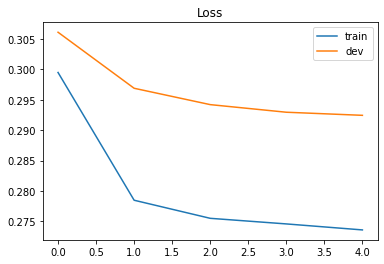

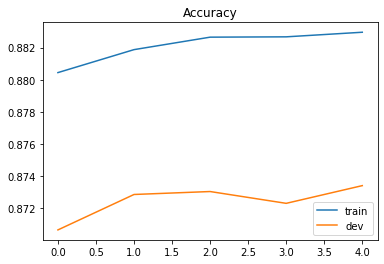

In [55]:
import numpy as np
import math
import matplotlib.pyplot as plt

np.random.seed(0)
X_train_fpath = './data/X_train'
Y_train_fpath = './data/Y_train'
X_test_fpath = './data/X_test'
output_fpath = './output_{}.csv'

with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)




with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1] for line in f], dtype = float)



with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)





def normalize_(X):
    X_mean = np.mean(X[:,] ,0)
    X_std = np.std(X[:,], 0)
    return (X-X_mean)/(X_std+1e-8)

def _train_dev_split(X, Y, dev_ratio = 0.1):
    # This function spilts data into training set and development set.
    train_size = int(len(X) * (1 - dev_ratio))
    return X[:train_size], Y[:train_size], X[train_size:], Y[train_size:]

def sigmoid(z):
    return np.clip(1 / (1.0 + np.exp(-z)), 1e-8, 1 - (1e-7))

def cross_entropy(Y, Y_prediction):
    return -(np.dot(Y,np.log(Y_prediction)) + np.dot((1-Y),np.log(1-Y_prediction)))



def function(w,x,b):
    return sigmoid(np.dot(w,x)+b)


def gradiant(w,x,b,Y):
    prediction = function(w,x,b)
    w_gradient  = -(Y - prediction) * X
    b_gradient = -(Y - prediction)
    return w_gradient, b_gradient


X_test = normalize_(X_test)
X_train = normalize_(X_train)

X_train, Y_train, X_dev, Y_dev = _train_dev_split(X_train, Y_train)


train_size = X_train.shape[0]
dev_size = X_dev.shape[0]
test_size = X_test.shape[0]
data_dim = X_train.shape[1]



print('Size of training set: {}'.format(train_size))
print('Size of development set: {}'.format(dev_size))
print('Size of testing set: {}'.format(test_size))
print('Dimension of data: {}'.format(data_dim))


# initailize our data
train_loss = []
dev_loss = []
train_acc = []
dev_acc = []
w = np.zeros((data_dim,))
b = np.zeros((1,))


learning_rate = 0.2

idx = 0

for epoch in range(5):
    y_train_pred = []
    X = []
    accuracy = 0
    for i in range(train_size):
        Y = Y_train[i]
        X = X_train[i]

        grad_w, grad_b = gradiant(w,X,b,Y)
        
        w = w - learning_rate/np.sqrt(i+1) * grad_w
        b = b - learning_rate/np.sqrt(i+1) * grad_b
    for i in range(train_size):
        y_train_pred.append(function(w, X_train[i],b))
        accuracy += np.abs(np.round(function(w, X_train[i],b)) - Y_train[i])
    
    print(1-accuracy/train_size)
    train_acc.append(1-accuracy/train_size)
    print(cross_entropy(Y_train, np.array(y_train_pred).T[0]) / train_size)
    train_loss.append(cross_entropy(Y_train, np.array(y_train_pred).T[0]) / train_size)

    accuracy = 0
    y_train_pred = []
    for i in range(dev_size):
        y_train_pred.append(function(w, X_dev[i],b))
        accuracy += np.abs(np.round(function(w, X_dev[i],b)) - Y_dev[i])

    print(1-accuracy/dev_size)
    dev_acc.append(1-accuracy/dev_size)
    print(cross_entropy(Y_dev, np.array(y_train_pred).T[0]) / dev_size)
    dev_loss.append(cross_entropy(Y_dev, np.array(y_train_pred).T[0]) / dev_size)






# Loss curve
plt.plot(train_loss)
plt.plot(dev_loss)
plt.title('Loss')
plt.legend(['train', 'dev'])
plt.savefig('loss.png')
plt.show()

# Accuracy curve
plt.plot(train_acc)
plt.plot(dev_acc)
plt.title('Accuracy')
plt.legend(['train', 'dev'])
plt.savefig('acc.png')
plt.show()
















 

      

